In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import sys
sys.path.append('./src/')
import geometry
from scipy.special import p_roots
from scipy.integrate import quad

In [2]:
int1, abserr,_,msg  = quad(geometry._bump,-1,1,epsabs=1e-15,epsrel=1e-15, full_output=1)
print(msg)
print('abs error is ', abserr, ' maybe this is enough')

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
abs error is  4.934386440677537e-15  maybe this is enough


In [3]:
def bump(x,h=1):
    return geometry._bump(x/h)/(int1*h)

this does not have integral 1, needs to be normalized

In [40]:
x, w = p_roots(1024)
h = 0.1
x = x

In [41]:
def convoluted_abs(x,h):
    if np.abs(x) >= h:
        return np.abs(x)
    b = lambda y: bump(y,h)*np.abs(x-y)
    return quad(b,-h,h,epsabs=1e-15,epsrel=1e-15,full_output=1)[0]
    
def d_convoluted_abs(x,h):
    if np.abs(x) >= h:
        return np.sign(x)
    b = lambda y: bump(y,h)*np.sign(x-y)
    return quad(b,-h,h, full_output=1)[0]
def dd_convoluted_abs(x,h):
    if np.abs(x) >= h:
        return 0
    return 2*bump(x,h)

In [42]:
y = np.array([convoluted_abs(xx,h) for xx in x])
dy = np.array([d_convoluted_abs(xx,h) for xx in x])
ddy = np.array([dd_convoluted_abs(xx,h) for xx in x])

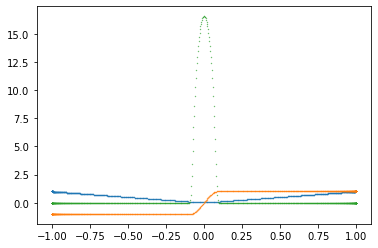

In [43]:
plt.scatter(x,y,s=0.1)
plt.scatter(x,dy,s=0.1)
plt.scatter(x,ddy,s=0.1)

In [23]:
a = x
k = ddy/((1+dy**2)**(1.5))

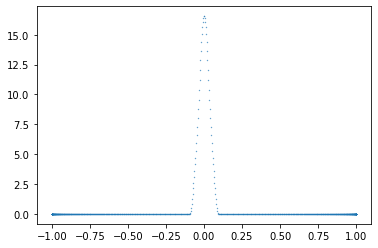

In [25]:
plt.scatter(a,k,s=0.1)

In [27]:
np.sum([np.abs(x)<h])/1024

0.064453125

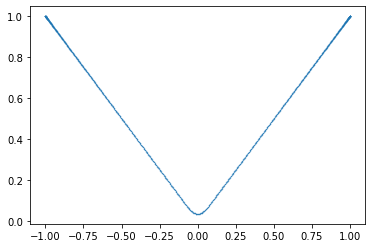

In [29]:
plt.scatter(x,y,s=0.1)

为了最高级的accuracy, 我应该把这个也给break成panels.